In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn as sk

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [7]:
columns = ['sepal_l', 'sepal_w', 'petal_l', 'petal_w', 'class']
data = pd.read_csv('iris-species/Iris.csv')

In [8]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
data.set_index('Id', inplace=True)

In [13]:
data.shape

(150, 5)

In [14]:
data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [15]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f09aa2c0750>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f09a2360b50>]], dtype=object)

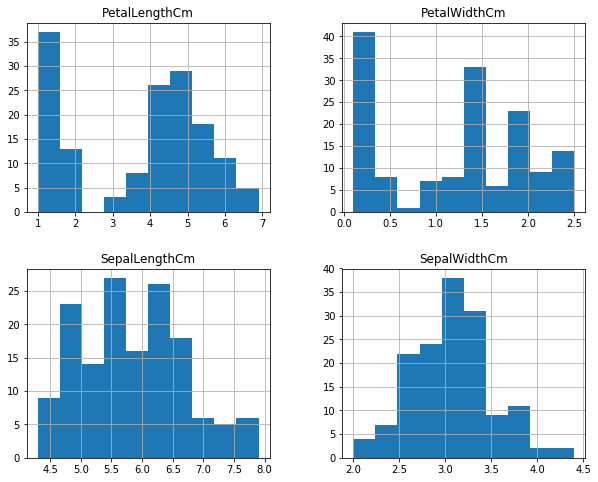

In [17]:
data.hist()

{'Iris-virginica': 'red', 'Iris-setosa': 'green', 'Iris-versicolor': 'blue'}


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f09aa1f6910>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f09a1835f10>]], dtype=object)

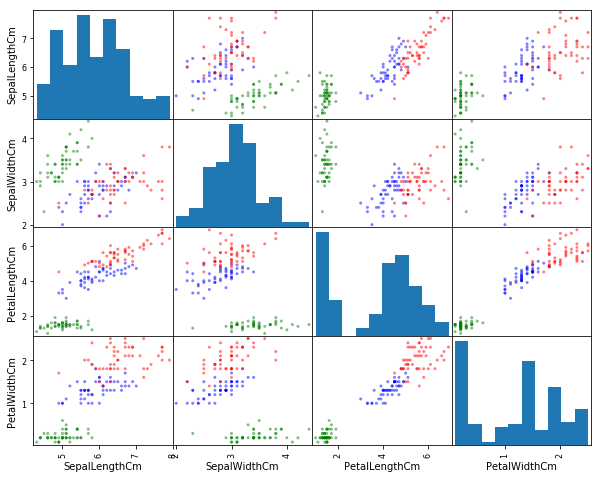

In [19]:
from pandas.plotting import scatter_matrix

#classes = np.unique(data['class'])
#colors = np.linspace(0.9,1, len(classes))
#colormap = dict(zip(classes, colors))
colormap = {'Iris-virginica': 'red', 'Iris-setosa': 'green', 'Iris-versicolor': 'blue'}

print colormap

scatter_matrix(data, c=[colormap[x] for x in data['Species']])

## Scatter matrix findings

- petal length and petal width can be clearly used to identify Iris-setosa
- varginica and versicolor are hard to seperate

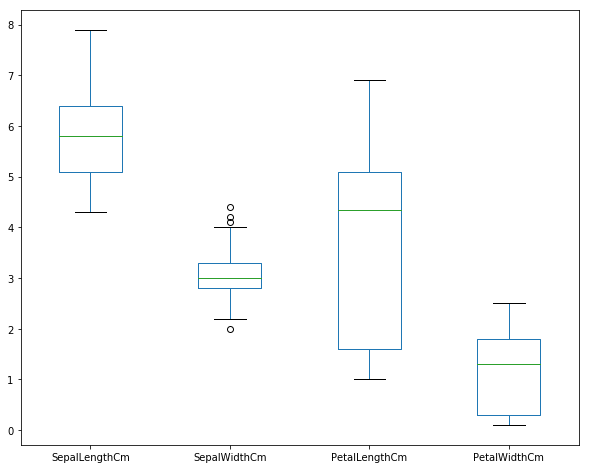

In [20]:
data.plot(kind='box')

### box plot finding

- sepal_w doesn't vary much across the classes

### Preprocessing Data

normalize data to have 0 mean and 1 standard deviation

In [109]:
from sklearn.model_selection import train_test_split

X = data.drop(['Species'],axis=1).values
Y = data['Species']
X_train, X_test, Y_train, Y_test  = train_test_split(X,Y, test_size=0.25, random_state=
                                                    10)

In [110]:
#remove mean and normalize to std of 1
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder().fit(Y_train)
scaler = StandardScaler(with_mean=True, with_std=True).fit(X_train)
X_train = scaler.transform(X_train)
Y_train = label_encoder.transform(Y_train)

In [87]:
X_train.mean(axis=0)
#almost zero

array([ -1.58206781e-15,   1.61595687e-15,   2.57730345e-17,
        -2.65660509e-16])

In [88]:
X_train.std(axis=0)

array([ 1.,  1.,  1.,  1.])

In [89]:
print X_train.shape
print X_test.shape

(112, 4)
(38, 4)


In [90]:
Y_train

array([2, 2, 0, 0, 1, 0, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 0, 0, 1, 0, 2, 0,
       0, 2, 1, 2, 0, 2, 0, 1, 1, 0, 2, 2, 2, 2, 2, 0, 1, 2, 1, 0, 2, 1, 1,
       0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 2, 2, 1, 1, 2, 2, 2, 2, 1, 0, 0, 1, 0,
       0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 2, 0, 1, 1, 2, 0, 2, 0, 1, 1, 2, 2,
       0, 1, 2, 2, 1, 1, 2, 0, 2, 0, 0, 1, 0, 2, 2, 2, 1, 0, 2, 0])

## Trying out Logistic Regression

Initially trying out a simple algorithm is helpful to gauge the problem, and define the measures we want to optimise

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold

clf = LogisticRegression(C=1)
kfold = KFold(n_splits=10)
scores = cross_val_score(clf, X_train, Y_train, cv = kfold)

print "Logistic Regression accuracy in training set", str(scores.mean()*100)+'%'
print "Logistic Regression standard Deviation", str(round(scores.std(),3))

Logistic Regression accuracy in training set 86.8181818182%
Logistic Regression standard Deviation 0.111


#### Adding F1 score to score the models

In [92]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, f1_score

clf = LogisticRegression(C=1)
kfold = KFold(n_splits=10)
scoring = {
    'f1' : make_scorer(f1_score, average="weighted"),
    'accuracy' : 'accuracy'
}
scores = cross_validate(clf, X_train, Y_train, cv = kfold, scoring = scoring)

for key, values in scores.items():
    print key,' mean ', values.mean()
    print key,' std ', values.std()



test_f1  mean  0.865701659452
test_f1  std  0.11472705496
train_accuracy  mean  0.892871287129
train_accuracy  std  0.00720530906878
score_time  mean  0.00151746273041
score_time  std  0.000364539981117
train_f1  mean  0.891430721001
train_f1  std  0.00716265301973
fit_time  mean  0.00149133205414
fit_time  std  0.000373189077434
test_accuracy  mean  0.868181818182
test_accuracy  std  0.110523007423


## Spot check algorithms

After defining the scoring measures, we can spot check algorithms.

In [93]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer, f1_score

def spot_check_classifiers(clfs, train_data, labels):
    kfold = KFold(n_splits=10)
    for clf in clfs:
        scoring = {
            'f1' : make_scorer(f1_score, average="weighted"),
            'accuracy' : 'accuracy'
        }
        scores = cross_validate(clf, train_data, labels, cv = kfold, scoring = scoring)
        print '---------------------------'
        print str(clf)
        print "---------------------------"
        for key, values in scores.items():
            print key,' mean ', values.mean()
            print key,' std ', values.std()


## Classification Algorithms

#### Trying out the following classification algorithms

    -LogisticRegression
    -Support Vector Machines - linear and rbf
    -K-nearest Classifier
    -Decision Tree Classifier
    -Gradient Bossting Classifier

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

clfs = []
clfs.append(LogisticRegression())
clfs.append(SVC(kernel="rbf"))
clfs.append(SVC(kernel="linear"))
clfs.append(KNeighborsClassifier(n_neighbors=3))
clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier())
clfs.append(GradientBoostingClassifier())

spot_check_classifiers(clfs, X_train, Y_train)

---------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
---------------------------
test_f1  mean  0.865701659452
test_f1  std  0.11472705496
train_accuracy  mean  0.892871287129
train_accuracy  std  0.00720530906878
score_time  mean  0.00145134925842
score_time  std  0.00041439903802
train_f1  mean  0.891430721001
train_f1  std  0.00716265301973
fit_time  mean  0.00148096084595
fit_time  std  0.000241415669594
test_accuracy  mean  0.868181818182
test_accuracy  std  0.110523007423
---------------------------
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
------------------------

#### Both Gradient Boosting Classifier and SVM gives high accuracy, choosing SVM as it's mean score_time is lesser 

## Optimise SVM

Using Grid search to tune algorithm parameters

Parameters to tune:
- kernel
- C - error penalty

In [96]:
#grid search with various parameters

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scoring = {
    'f1' : make_scorer(f1_score, average="weighted"),
    'accuracy' : 'accuracy'
}

params_grid = {
    'kernel' : ['linear', 'rbf', 'poly', 'sigmoid'],
    'C' : np.linspace(0.1,1.2,12),
}

clf = SVC()

gridsearch = GridSearchCV(clf, params_grid, scoring=scoring, refit='accuracy')
gridsearch.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2])},
       pre_dispatch='2*n_jobs', refit='accuracy', return_train_score=True,
       scoring={'f1': make_scorer(f1_score, average=weighted), 'accuracy': 'accuracy'},
       verbose=0)

In [97]:
gridsearch.best_score_

0.9464285714285714

In [98]:
gridsearch.best_estimator_

SVC(C=0.20000000000000001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [67]:
#gridsearch.cv_results_

### best model is linear SVM with C = 0.2

In [99]:
best_clf = SVC(kernel="linear", C=0.2)

spot_check_classifiers([best_clf], X_train, Y_train)

---------------------------
SVC(C=0.2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
---------------------------
test_f1  mean  0.955947133674
test_f1  std  0.0442269751384
train_accuracy  mean  0.974198019802
train_accuracy  std  0.00795132728096
score_time  mean  0.00185480117798
score_time  std  0.000243873077063
train_f1  mean  0.974167975793
train_f1  std  0.00797495988402
fit_time  mean  0.0010950088501
fit_time  std  0.000101411605366
test_accuracy  mean  0.956060606061
test_accuracy  std  0.0440176940798


In [100]:
##saving model
#import pickle

#pickle.dump(best_clf, open('best_iris_classifier', 'wb'))

In [101]:
#model = pickle.load(open('best_iris_classifier', 'rb'))

### Run the model on Test data set

In [116]:
best_clf.fit(X_train, Y_train)

X_test = scaler.transform(X_test)
Y_test = label_encoder.transform(Y_test)
best_clf.score(X_test, Y_test)

1.0

## accuracy of the model in test set is 93%

In [107]:
X_test

array([[-14.56431876, -32.08174722,  -3.12529748,  -3.29151311],
       [-14.39294659, -27.36215067,  -2.96735468,  -1.98310723],
       [-16.1066683 , -15.5631593 ,  -3.63422428,  -5.69025723],
       [-14.9070631 , -23.82245326,  -3.09019908,  -3.07344547],
       [-16.79215698, -20.28275585,  -3.65177348,  -5.69025723],
       [-16.79215698, -35.62144464,  -3.28324028,  -3.94571605],
       [-14.56431876, -29.72194895,  -3.03755148,  -2.85537782],
       [-15.42117961, -27.36215067,  -3.17794508,  -3.94571605],
       [-16.62078481, -19.10285671,  -3.63422428,  -5.69025723],
       [-15.59255179, -26.18225153,  -3.10774828,  -3.29151311],
       [-15.76392396, -23.82245326,  -3.10774828,  -2.85537782],
       [-15.42117961, -27.36215067,  -3.00245308,  -1.98310723],
       [-15.93529613, -32.08174722,  -3.19549428,  -3.29151311],
       [-16.96352915, -23.82245326,  -3.65177348,  -5.69025723],
       [-16.62078481, -14.38326016,  -3.63422428,  -5.47218958],
       [-13.7074579 , -23

In [115]:
X_train

array([[ 2.2256217 , -1.08137229,  1.78258025,  1.44265925],
       [ 1.26827314,  0.05691433,  0.77481755,  1.44265925],
       [-1.00542968,  0.73988631, -1.18472103, -1.02120823],
       [-1.00542968,  0.96754363, -1.18472103, -0.76185376],
       [-0.76609254, -0.85371497,  0.10297575,  0.27556413],
       [-1.60377252, -1.76434427, -1.35268148, -1.15088547],
       [ 0.55026173,  0.51222898,  0.55087029,  0.5349186 ],
       [-0.76609254,  2.33348758, -1.24070785, -1.41023994],
       [ 1.26827314,  0.05691433,  0.66284392,  0.40524136],
       [ 0.07158745,  0.28457166,  0.6068571 ,  0.79427307],
       [-0.28741826, -0.62605764,  0.66284392,  1.05362754],
       [ 1.028936  ,  0.51222898,  1.11073845,  1.70201372],
       [ 0.43059316, -1.99200159,  0.43889665,  0.40524136],
       [ 1.62727885,  1.19520095,  1.33468572,  1.70201372],
       [-0.40708683, -1.53668694, -0.00899788, -0.24314482],
       [ 0.19125602, -0.39840032,  0.43889665,  0.40524136],
       [ 0.6699303 ,  0.